Processing replica000...
Reactant dipole for replica000: 3.3270
Product dipole for replica000: 13.0470
Processing replica001...
Reactant dipole for replica001: 3.3270
Product dipole for replica001: 13.0470
Processing replica002...
Reactant dipole for replica002: 3.3270
Product dipole for replica002: 13.0470
Processing replica003...
Reactant dipole for replica003: 3.3270
Product dipole for replica003: 13.0470
Processing replica004...
Reactant dipole for replica004: 3.3270
Product dipole for replica004: 13.0470
Processing replica005...
Reactant dipole for replica005: 3.3270
Product dipole for replica005: 13.0470
Processing replica006...
Reactant dipole for replica006: 3.3270
Product dipole for replica006: 13.0470
Processing replica007...
Reactant dipole for replica007: 3.3270
Product dipole for replica007: 13.0470
Processing replica008...
Reactant dipole for replica008: 3.3270
Product dipole for replica008: 13.0470
Processing replica009...
Reactant dipole for replica009: 3.3270
Product d

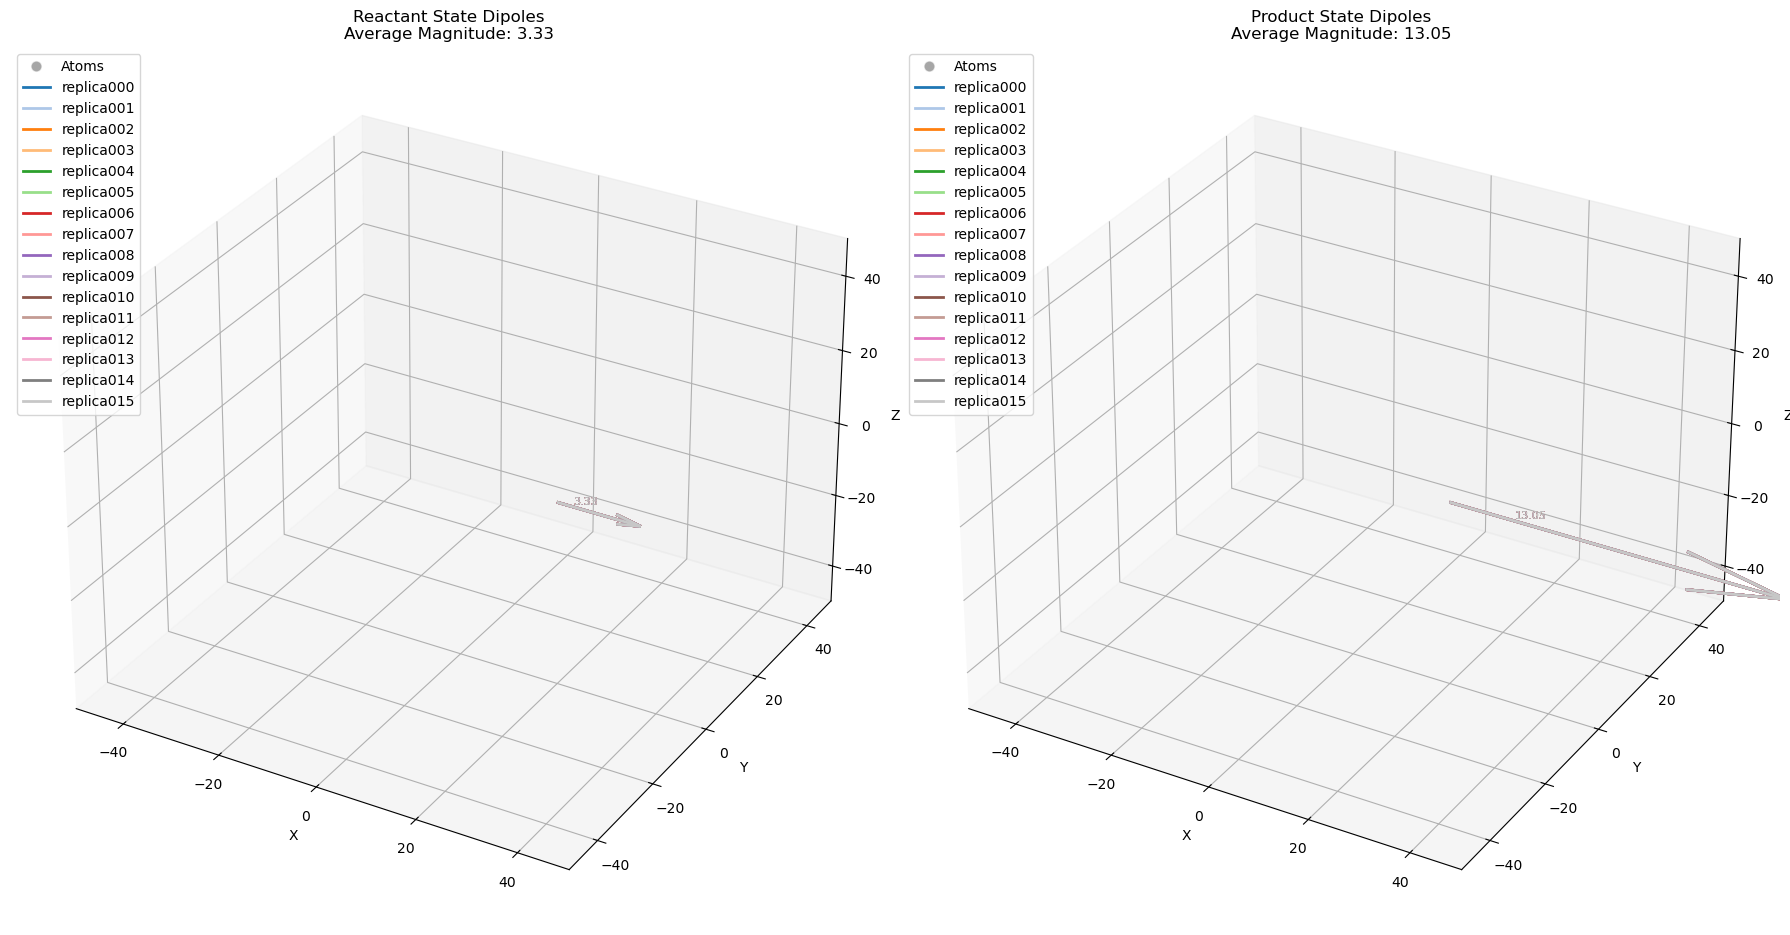

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Define the base directory for the replicas
base_dir = "/home/hp/results/MOUSE/level3/F48Y"

# Define charges for the reactant state
charges_reactant = {
    1: -0.335, 2: 0.155, 3: 0.06, 4: 0.06, 5: 0.06, 6: 0.14, 7: 0.06, 8: -0.5, 9: 0.3,
    10: -0.418, 11: -0.418, 12: 0.418, 13: 0.418, 14: -0.76, 15: 0.38, 16: 0.38, 17: 0.5,
    18: -0.5, 19: -0.12, 20: 0.06, 21: 0.06, 22: -0.12, 23: 0.06, 24: 0.06
}

# Define charges for the product state
charges_product = {
    1: -0.9, 2: 0.418, 3: -0.3, 4: 0.1, 5: 0.1, 6: 0.14, 7: 0.06, 8: -0.5, 9: 0.3,
    10: -0.418, 11: -0.418, 12: 0.418, 13: 0.418, 14: -0.4965, 15: 0.48, 16: 0.48, 17: 0.2858,
    18: -0.503, 19: -0.12, 20: 0.06, 21: 0.06, 22: 0.2157, 23: 0.06, 24: 0.06
}

# Get list of replica directories (from replica000 to replica015)
replica_dirs = [f"replica{str(i).zfill(3)}" for i in range(16)]

# Create a figure with 2 subplots side by side
fig = plt.figure(figsize=(18, 10))

# Create the reactant subplot
ax1 = fig.add_subplot(121, projection='3d')
# Create the product subplot
ax2 = fig.add_subplot(122, projection='3d')

# Store reactant and product data
reactant_dipoles = []
reactant_centers = []
reactant_coordinates = []
product_dipoles = []
product_centers = []
product_coordinates = []
valid_replicas = []

# For saving dipole data
all_dipole_data = {}

# Create distinct colors for replicas
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors = np.vstack((colors, plt.cm.Set1(np.linspace(0, 1, 9))))
colors = colors[:len(replica_dirs)]

# Process all replicas
for i, replica in enumerate(replica_dirs):
    print(f"Processing {replica}...")
    
    # Process reactant data
    reactant_file = os.path.join(base_dir, replica, "reactant.csv")
    product_file = os.path.join(base_dir, replica, "product.csv")
    
    # Skip if files don't exist
    if not os.path.exists(reactant_file) or not os.path.exists(product_file):
        print(f"Warning: Files missing for {replica}. Skipping...")
        continue
    
    # Load data
    try:
        reactant_data = pd.read_csv(reactant_file)
        product_data = pd.read_csv(product_file)
    except Exception as e:
        print(f"Error reading files for {replica}: {e}")
        continue
    
    # Process reactant coordinates
    try:
        # Determine column names for coordinates
        if 'x' in reactant_data.columns and 'y' in reactant_data.columns and 'z' in reactant_data.columns:
            x_col, y_col, z_col = 'x', 'y', 'z'
        else:
            numerical_cols = reactant_data.select_dtypes(include=[np.number]).columns
            if len(numerical_cols) >= 3:
                x_col, y_col, z_col = numerical_cols[:3]
            else:
                x_col, y_col, z_col = reactant_data.columns[1], reactant_data.columns[2], reactant_data.columns[3]
        
        # Extract reactant coordinates
        reactant_coord = np.array([
            reactant_data[x_col].values,
            reactant_data[y_col].values,
            reactant_data[z_col].values
        ]).T
        
        reactant_coordinates.append(reactant_coord)
        
        # Process product coordinates (use the same column names)
        product_coord = np.array([
            product_data[x_col].values,
            product_data[y_col].values,
            product_data[z_col].values
        ]).T
        
        product_coordinates.append(product_coord)
        valid_replicas.append(replica)
        
    except Exception as e:
        print(f"Error extracting coordinates for {replica}: {e}")
        continue
    
    # Match coordinates to charges for reactant
    num_atoms_reactant = len(reactant_coord)
    charges_used_reactant = {}
    for j in range(min(num_atoms_reactant, len(charges_reactant))):
        charges_used_reactant[j+1] = charges_reactant[j+1]
    
    # Match coordinates to charges for product
    num_atoms_product = len(product_coord)
    charges_used_product = {}
    for j in range(min(num_atoms_product, len(charges_product))):
        charges_used_product[j+1] = charges_product[j+1]
    
    # Check for NaN values
    if np.any(np.isnan(reactant_coord)) or np.any(np.isnan(product_coord)):
        print(f"Warning: NaN values detected for {replica}. Cleaning up...")
        reactant_coord = np.nan_to_num(reactant_coord, nan=0.0)
        product_coord = np.nan_to_num(product_coord, nan=0.0)
    
    # Calculate center of mass for reactant
    reactant_com = np.mean(reactant_coord, axis=0)
    reactant_centers.append(reactant_com)
    
    # Calculate center of mass for product
    product_com = np.mean(product_coord, axis=0)
    product_centers.append(product_com)
    
    # Calculate dipole moment for reactant
    reactant_dipole = np.zeros(3)
    for j in range(len(charges_used_reactant)):
        if j < len(reactant_coord):
            r_i = reactant_coord[j] - reactant_com
            reactant_dipole += charges_used_reactant[j+1] * r_i
    
    reactant_dipoles.append(reactant_dipole)
    
    # Calculate dipole moment for product
    product_dipole = np.zeros(3)
    for j in range(len(charges_used_product)):
        if j < len(product_coord):
            r_i = product_coord[j] - product_com
            product_dipole += charges_used_product[j+1] * r_i
    
    product_dipoles.append(product_dipole)
    
    # Print dipole magnitudes
    reactant_magnitude = np.linalg.norm(reactant_dipole)
    product_magnitude = np.linalg.norm(product_dipole)
    print(f"Reactant dipole for {replica}: {reactant_magnitude:.4f}")
    print(f"Product dipole for {replica}: {product_magnitude:.4f}")
    
    # Store dipole data for this replica
    all_dipole_data[replica] = {
        'reactant': {
            'dipole_vector': reactant_dipole,
            'magnitude': reactant_magnitude,
            'center': reactant_com
        },
        'product': {
            'dipole_vector': product_dipole,
            'magnitude': product_magnitude,
            'center': product_com
        }
    }
    
    # Save dipole data in replica folder for PyMol visualization
    replica_dir = os.path.join(base_dir, replica)
    
    # Save reactant dipole data
    reactant_dipole_file = os.path.join(replica_dir, "reactant_dipole.py")
    with open(reactant_dipole_file, 'w') as f:
        f.write("from pymol import cmd\n")
        f.write("from pymol.cgo import *\n\n")
        f.write("# Dipole moment visualization for reactant state\n")
        f.write(f"# Magnitude: {reactant_magnitude:.4f}\n\n")
        f.write("# Create the dipole arrow\n")
        start = reactant_com
        end = reactant_com + (reactant_dipole/reactant_magnitude * 5.0 if reactant_magnitude > 0 else np.zeros(3))
        f.write(f"dipole_obj = [\n")
        f.write(f"    CYLINDER,\n")
        f.write(f"    {start[0]:.6f}, {start[1]:.6f}, {start[2]:.6f},\n")
        f.write(f"    {end[0]:.6f}, {end[1]:.6f}, {end[2]:.6f},\n")
        f.write(f"    0.3,  # radius\n")
        f.write(f"    1.0, 0.0, 0.0,  # color start (red)\n")
        f.write(f"    1.0, 0.0, 0.0,  # color end (red)\n")
        f.write(f"]\n\n")
        f.write("# Load the dipole into PyMOL\n")
        f.write("cmd.load_cgo(dipole_obj, 'reactant_dipole')\n")
    
    # Save product dipole data
    product_dipole_file = os.path.join(replica_dir, "product_dipole.py")
    with open(product_dipole_file, 'w') as f:
        f.write("from pymol import cmd\n")
        f.write("from pymol.cgo import *\n\n")
        f.write("# Dipole moment visualization for product state\n")
        f.write(f"# Magnitude: {product_magnitude:.4f}\n\n")
        f.write("# Create the dipole arrow\n")
        start = product_com
        end = product_com + (product_dipole/product_magnitude * 5.0 if product_magnitude > 0 else np.zeros(3))
        f.write(f"dipole_obj = [\n")
        f.write(f"    CYLINDER,\n")
        f.write(f"    {start[0]:.6f}, {start[1]:.6f}, {start[2]:.6f},\n")
        f.write(f"    {end[0]:.6f}, {end[1]:.6f}, {end[2]:.6f},\n")
        f.write(f"    0.3,  # radius\n")
        f.write(f"    0.0, 0.0, 1.0,  # color start (blue)\n")
        f.write(f"    0.0, 0.0, 1.0,  # color end (blue)\n")
        f.write(f"]\n\n")
        f.write("# Load the dipole into PyMOL\n")
        f.write("cmd.load_cgo(dipole_obj, 'product_dipole')\n")

# Calculate average magnitudes
reactant_magnitudes = [np.linalg.norm(d) for d in reactant_dipoles]
product_magnitudes = [np.linalg.norm(d) for d in product_dipoles]

avg_reactant_magnitude = np.mean(reactant_magnitudes) if reactant_magnitudes else 0.0
avg_product_magnitude = np.mean(product_magnitudes) if product_magnitudes else 0.0

# Plot atoms from first replica if available
if reactant_coordinates:
    # First replica atoms
    ax1.scatter(reactant_coordinates[0][:, 0], reactant_coordinates[0][:, 1], 
               reactant_coordinates[0][:, 2], color='gray', s=30, alpha=0.3)

if product_coordinates:
    # First replica atoms
    ax2.scatter(product_coordinates[0][:, 0], product_coordinates[0][:, 1], 
               product_coordinates[0][:, 2], color='gray', s=30, alpha=0.3)

# Create legend elements
legend_elements_reactant = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='gray', markersize=8, 
                             label='Atoms', alpha=0.7)]

legend_elements_product = [plt.Line2D([0], [0], marker='o', color='w', 
                             markerfacecolor='gray', markersize=8, 
                             label='Atoms', alpha=0.7)]

# Increased scale factor for visibility of arrows
scale_factor = 5.0  # Adjust scale factor for better visibility

# Plot reactant dipoles
for i, (replica, dipole) in enumerate(zip(valid_replicas, reactant_dipoles)):
    # Skip tiny dipoles
    dipole_magnitude = np.linalg.norm(dipole)
    if dipole_magnitude < 1e-10:
        continue
    
    # Use color based on replica index
    color = colors[i % len(colors)]
    
    # Plot dipole as arrow
    ax1.quiver(reactant_centers[i][0], reactant_centers[i][1], reactant_centers[i][2],
               dipole[0], dipole[1], dipole[2], color=color, linewidth=2,
               length=scale_factor, normalize=False)
    
    # Add the dipole magnitude as a label next to the arrow
    ax1.text(reactant_centers[i][0] + dipole[0], reactant_centers[i][1] + dipole[1],
             reactant_centers[i][2] + dipole[2], f'{dipole_magnitude:.2f}', color=color,
             fontsize=8, verticalalignment='bottom')

    # Add replica name to legend without magnitude
    legend_elements_reactant.append(plt.Line2D([0], [0], color=color, lw=2, label=f'{replica}'))

# Plot product dipoles
for i, (replica, dipole) in enumerate(zip(valid_replicas, product_dipoles)):
    # Skip tiny dipoles
    dipole_magnitude = np.linalg.norm(dipole)
    if dipole_magnitude < 1e-10:
        continue
    
    # Use color based on replica index
    color = colors[i % len(colors)]
    
    # Plot dipole as arrow
    ax2.quiver(product_centers[i][0], product_centers[i][1], product_centers[i][2],
               dipole[0], dipole[1], dipole[2], color=color, linewidth=2,
               length=scale_factor, normalize=False)
    
    # Add the dipole magnitude as a label next to the arrow
    ax2.text(product_centers[i][0] + dipole[0], product_centers[i][1] + dipole[1],
             product_centers[i][2] + dipole[2], f'{dipole_magnitude:.2f}', color=color,
             fontsize=8, verticalalignment='bottom')

    # Add replica name to legend without magnitude
    legend_elements_product.append(plt.Line2D([0], [0], color=color, lw=2, label=f'{replica}'))

# Set axis limits
ax1.set_xlim([-50, 50])
ax1.set_ylim([-50, 50])
ax1.set_zlim([-50, 50])

ax2.set_xlim([-50, 50])
ax2.set_ylim([-50, 50])
ax2.set_zlim([-50, 50])

# Add legends to both subplots
ax1.legend(handles=legend_elements_reactant, loc='upper left', fontsize=10)
ax2.legend(handles=legend_elements_product, loc='upper left', fontsize=10)

# Label axes
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Set titles with average magnitudes
ax1.set_title(f'Reactant State Dipoles\nAverage Magnitude: {avg_reactant_magnitude:.2f}')
ax2.set_title(f'Product State Dipoles\nAverage Magnitude: {avg_product_magnitude:.2f}')

# Save dipole summary for all replicas
summary_file = os.path.join(base_dir, "dipole_summary.csv")
summary_data = []
for replica in valid_replicas:
    summary_data.append({
        'Replica': replica,
        'Reactant_Dipole_X': all_dipole_data[replica]['reactant']['dipole_vector'][0],
        'Reactant_Dipole_Y': all_dipole_data[replica]['reactant']['dipole_vector'][1],
        'Reactant_Dipole_Z': all_dipole_data[replica]['reactant']['dipole_vector'][2],
        'Reactant_Magnitude': all_dipole_data[replica]['reactant']['magnitude'],
        'Product_Dipole_X': all_dipole_data[replica]['product']['dipole_vector'][0],
        'Product_Dipole_Y': all_dipole_data[replica]['product']['dipole_vector'][1],
        'Product_Dipole_Z': all_dipole_data[replica]['product']['dipole_vector'][2],
        'Product_Magnitude': all_dipole_data[replica]['product']['magnitude']
    })

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(summary_file, index=False)
print(f"Dipole summary saved to {summary_file}")

plt.tight_layout()
plt.show()